# Projet Titanic

Objectif: The aim of the project is to predict if a passenger survived the sinking of the Titanic or not.

Output ==> **Discrete value**

So, it's a **Classification** problem

I.Exploratory Data analysis

1. [Formal_analysis](#Formal_analysis)
    1. Target Variable
        - **`Survived`**
    2. Nb Lines & Columns
        - **`(891, 10)`**
    3. Types of Variables
        - **`object: 5`**
        - **`int64: 4`**
        - **`float64: 2`**
    4. Missing Values
        - **`"Age,Cabin,Embarked"`**
2. [Substansive_analysis](#Substansive_analysis)
    1. Target visualization
        - Binary classification ==> (0:549 / 1:342)
    2. Meaning of variables
        1. Univariate
            - Discrete variables :
        
            - Continous variables : 
                1. Age ==> close to a normal distribution
                2. Fare ==> right skew (positive)
        2. Multivariate
    3. Relation Variables / Target
        - **`Age ==> Women tends to survive compare to men (0.742038% of women has survived)  `**
        - **`int64: 35`**
        - **`float64: 3`**
        - ***``***
    4. Detailed analysis (optionnal==>here we will not do any deeper analysis)
        1. - **Relation Variables / Variables**
        2. - **NaN analysis**
        3. - **Hypothesis testing**
        
II.Modelisation

3. [Pre-Processing](#Pre-Processing)
    1. Train_test
    2. Verify NaN values
    3. Encoding
    4. Feature Selection
        - We got our final dataset : df_final
4. [Modelisation](#Modelisation)
    1. List of models
        - Linear regression
        - Ridge regression
        - Bayesian Ridge
        - RANSAC (RANdom SAmple Consensus)
        - SGDRegressor (Stochastic Gradient descent)
        - KNeighborsRegressor
        - DecisionTreeRegressor
        - SVR(Support Vector Regression)
        - PLSRegression(Partial Least Squares)+
        - GradientBoostingRegressor
        - MLPRegressor(Multi-Layer Perceptron)
    2. Best models
        - `The best model is : SVR`
    3. Prediction
    4. Optimisation
        - **We find the best parameters : 'C': 1, 'gamma': 0.01**
       
5. [Submissions](#Submission)

# Exploratory_Data_Analysis

## Formal_analysis

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### A.Target Variable

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y_train=train[["Survived"]]

In [4]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### B.Nb Lines & Columns

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.set_index("PassengerId",inplace=True)

In [7]:
train.shape

(891, 11)

### C.Types of Variables

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### D.Missing Values

In [9]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Features with missing values : "Age,Cabin,Embarked"

## Substansive_analysis

### A.Target visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
y_train.value_counts()

Survived
0           549
1           342
dtype: int64

<AxesSubplot: >

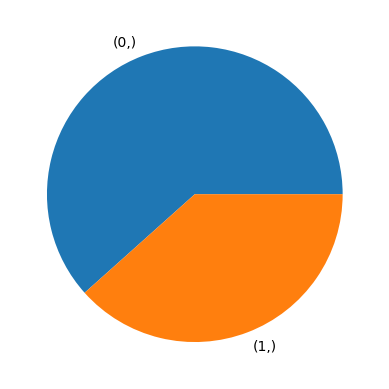

In [11]:
y_train.value_counts().plot.pie()

### B.Meaning of variables

In [12]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In this section I will separate quantitave and qualitative data.

#### B.1.Quantitative data

### a.Univariate_analysis

In [14]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [16]:
train_quant=train[["Age","Fare"]]

In [17]:
def plot_quantitative():
    for i in train_quant.columns.tolist():
        sns.displot(train_quant,x=i,kde=True)

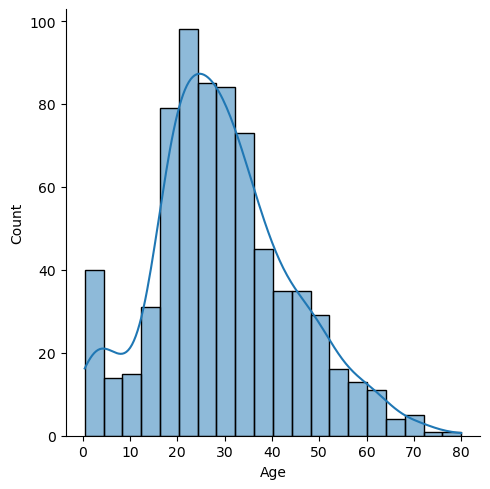

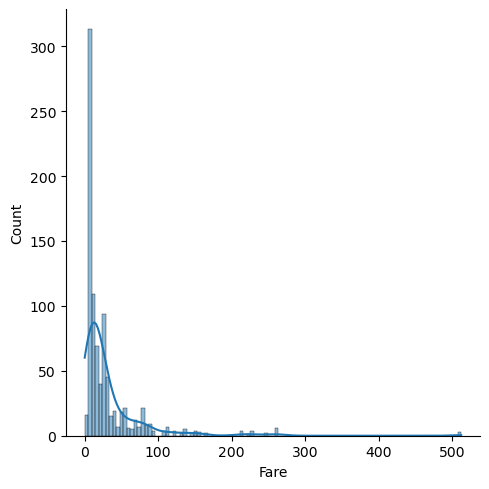

In [18]:
plot_quantitative()

### b.Multivariate_analysis

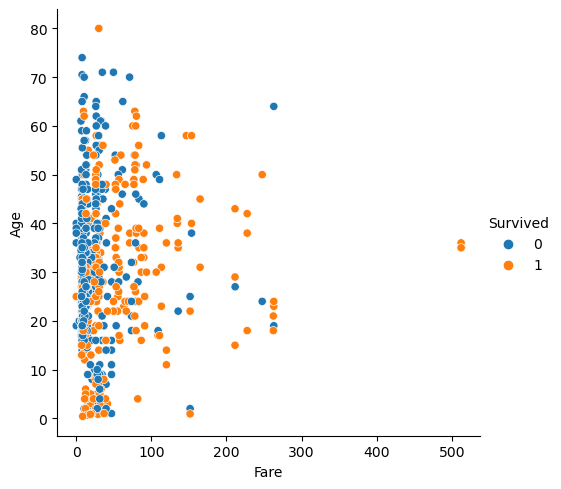

In [19]:
sns.relplot(data=train,x='Fare',y="Age",hue="Survived")

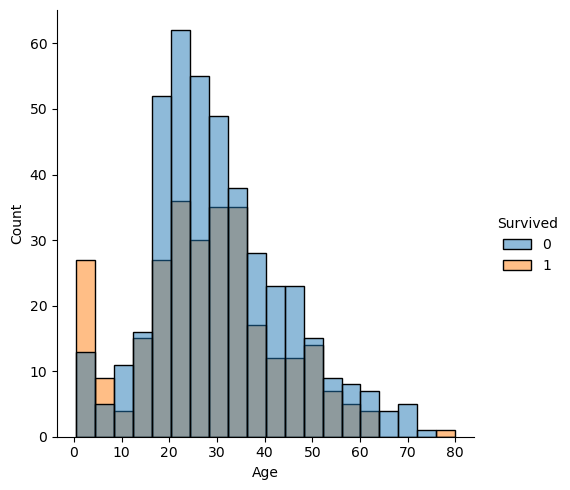

In [20]:
sns.displot(data=train,x='Age',hue="Survived")

### Creating_continious_features

In [21]:
train["AverageFarePclass"]=train["Fare"].loc[train['Pclass']==1].mean()

In [22]:
train["AverageFarePclass"] = train.groupby("Pclass")["Fare"].transform("mean")

In [23]:
train["AverageFareEmbarked"] = train.groupby("Embarked")["Fare"].transform("mean")

In [24]:
train["AverageFareSipSp"] = train.groupby("SibSp")["Fare"].transform("mean")

In [25]:
train["AverageFareParch"] = train.groupby("Parch")["Fare"].transform("mean")

In [26]:
train["SurviveAgeQ1"]=0
train.loc[(train["Survived"]==1) & (train["Age"]<25),"SurviveAgeQ1"]=1

In [27]:
train['SurviveAgeQ2']=0
train.loc[(train["Survived"]==1) & (train["Age"]>=25)& (train["Age"]<50),'SurviveAgeQ2']=1

In [28]:
train['SurviveAgeQ3']=0
train.loc[(train["Survived"]==1) & (train["Age"]>=50)& (train["Age"]<75),'SurviveAgeQ3']=1


In [29]:
train['SurviveAgeQ4']=0
train.loc[(train["Survived"]==1) & (train["Age"]>=75),'SurviveAgeQ4']=1


In [30]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AverageFarePclass,AverageFareEmbarked,AverageFareSipSp,AverageFareParch,SurviveAgeQ1,SurviveAgeQ2,SurviveAgeQ3,SurviveAgeQ4
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.675550,27.079812,44.147370,25.586774,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687,59.954144,44.147370,25.586774,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.675550,27.079812,25.692028,25.586774,0,1,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,84.154687,27.079812,44.147370,25.586774,0,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.675550,27.079812,25.692028,25.586774,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20.662183,27.079812,25.692028,25.586774,0,0,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,84.154687,27.079812,25.692028,25.586774,1,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,13.675550,27.079812,44.147370,64.337604,0,0,0,0


### B.2 Qualitative_data

In [31]:
train_qualitative=train[["Pclass","SibSp","Parch","Sex","Cabin","Embarked","Survived"]]

In [32]:
train_qualitative

,Pclass,SibSp,Parch,Sex,Cabin,Embarked,Survived
PassengerId,,,,,,,
1,3,1,0,male,NaN,S,0
2,1,1,0,female,C85,C,1
3,3,0,0,female,NaN,S,1
4,1,1,0,female,C123,S,1
5,3,0,0,male,NaN,S,0
...,...,...,...,...,...,...,...
887,2,0,0,male,NaN,S,0
888,1,0,0,female,B42,S,1
889,3,1,2,female,NaN,S,0


In [33]:
train_qualitative.describe()

,Pclass,SibSp,Parch,Survived
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,0.383838
std,0.836071,1.102743,0.806057,0.486592
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000
max,3.000000,8.000000,6.000000,1.000000


### a.Univariate_analysis

In [34]:
train.isna().sum()

Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
AverageFarePclass        0
AverageFareEmbarked      2
AverageFareSipSp         0
AverageFareParch         0
SurviveAgeQ1             0
SurviveAgeQ2             0
SurviveAgeQ3             0
SurviveAgeQ4             0
dtype: int64

In [35]:
a=train_qualitative.columns.tolist()

In [36]:
a.remove('Cabin')

In [37]:
a

['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Survived']

In [38]:
train_qualitative["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
for i in a:
    train_qualitative[i].value_counts()

In [40]:
train_qualitative.loc[train_qualitative['Embarked'].isna()==True]

,Pclass,SibSp,Parch,Sex,Cabin,Embarked,Survived
PassengerId,,,,,,,
62,1,0,0,female,B28,NaN,1
830,1,0,0,female,B28,NaN,1


2 women travelled without the info for the port of embarkation

In [41]:
liste_cabin=np.unique(train_qualitative['Cabin'].dropna())
print(liste_cabin)

['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3' 'B30'
 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78' 'B79' 'B80'
 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111'
 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2' 'C22 C26'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C54'
 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 'E68' 'E77' 'E8' 'F E69' 'F G63' 'F G73' 'F2' 'F33'
 'F38' 'F4' 'G6' 'T']


In [42]:
train_qualitative['Cabin'].isna().sum()/train.shape[0]

0.7710437710437711

In [43]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

### b. Multivariate_analysis

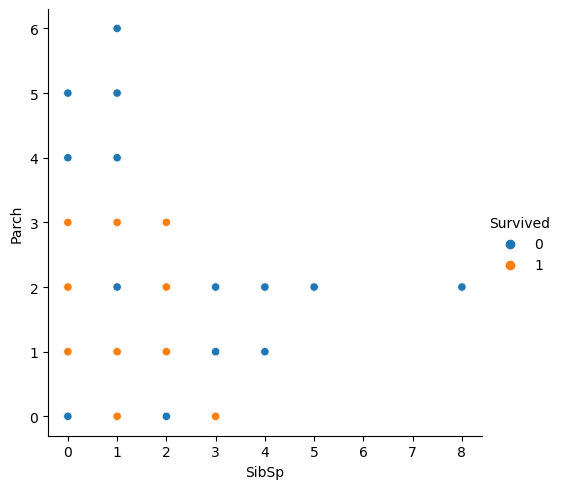

In [44]:
sns.relplot(train_qualitative,x="SibSp",y="Parch",hue="Survived")

train.loc[(train['Parch'] >= 1) & (train['Parch'] <= 3)&(train['SibSp'] >= 1)&(train['SibSp'] <= 3)]=1 

In [45]:
train["SurvivorFamily"] = 0
train.loc[(train['Parch'] >= 1) & (train['Parch'] <= 3) & (train['SibSp'] >= 1) & (train['SibSp'] <= 3), "SurvivorFamily"] = 1

In [46]:
train['SurvivorFamily'].value_counts()

0    786
1    105
Name: SurvivorFamily, dtype: int64

In [47]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AverageFarePclass,AverageFareEmbarked,AverageFareSipSp,AverageFareParch,SurviveAgeQ1,SurviveAgeQ2,SurviveAgeQ3,SurviveAgeQ4,SurvivorFamily
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.675550,27.079812,44.147370,25.586774,0,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687,59.954144,44.147370,25.586774,0,1,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.675550,27.079812,25.692028,25.586774,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,84.154687,27.079812,44.147370,25.586774,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.675550,27.079812,25.692028,25.586774,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20.662183,27.079812,25.692028,25.586774,0,0,0,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,84.154687,27.079812,25.692028,25.586774,1,0,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,13.675550,27.079812,44.147370,64.337604,0,0,0,0,1


People tends to survive with the number of Parch and SibSP between 1 and 3

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

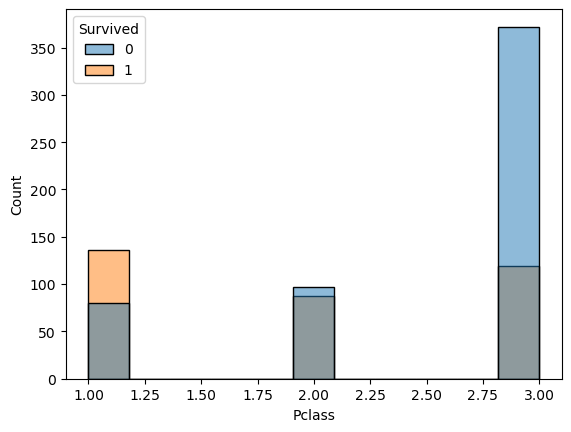

In [48]:
sns.histplot(train_qualitative,x="Pclass",hue="Survived")

In [49]:
train["Pclass"].loc[train['Survived']==1].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [50]:
train["Pclass"].loc[train['Survived']==0].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [51]:
train["Pclass"].loc[train['Survived']==1].value_counts()/train["Pclass"].value_counts()

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

We can see that higher ticket class tends to survive

<AxesSubplot: xlabel='Embarked', ylabel='Count'>

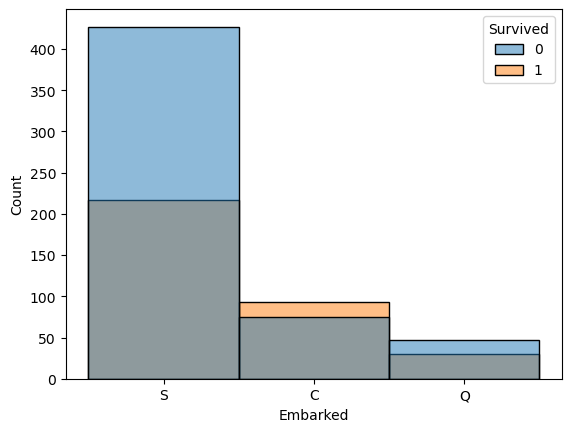

In [52]:
sns.histplot(train_qualitative,x="Embarked",hue="Survived")

In [53]:
print(train["Embarked"].loc[train['Survived']==0].value_counts())
print(train["Embarked"].loc[train['Survived']==1].value_counts())

S    427
C     75
Q     47
Name: Embarked, dtype: int64
S    217
C     93
Q     30
Name: Embarked, dtype: int64


In [54]:
train["Embarked"].loc[train['Survived']==1].value_counts()/train["Embarked"].value_counts()

S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64

C = Cherbourg, Q = Queenstown, S = Southampton  


People from Cherbourg is more likely to survive than people from other port.

<AxesSubplot: xlabel='Sex', ylabel='Proportion'>

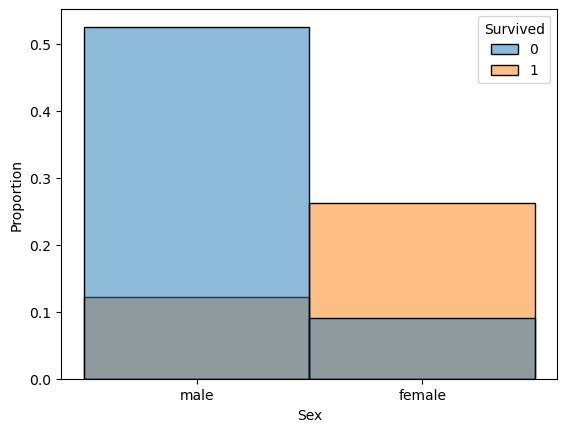

In [55]:
sns.histplot(train_qualitative,x="Sex",hue="Survived",stat="proportion")

In [56]:
train["Sex"].loc[train['Survived']==1].value_counts()/train["Sex"].value_counts()

female    0.742038
male      0.188908
Name: Sex, dtype: float64

In [57]:
train["Age"].isna().sum()/train.shape[0]

0.19865319865319866

In [58]:
cabin=train[['Cabin']].dropna()

In [59]:
cabin['Cabin'].str.slice(0,1).unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [60]:
cabin.reset_index(inplace=True)
cabin.drop("PassengerId",axis=1,inplace=True)

In [61]:
cabin['Cabin']=cabin['Cabin'].convert_dtypes('str')

In [62]:
cabin['Deck']=cabin['Cabin'].str.slice(0,1)

In [63]:
cabin['Room']=cabin['Cabin'].str.slice(1,4)

In [64]:
cabin['Room']

0       85
1      123
2       46
3        6
4      103
      ... 
199     35
200    51 
201     50
202     42
203    148
Name: Room, Length: 204, dtype: string

In [81]:
#We will use this imputation into our original data set
def imputation_cabin(X):
    X['Deck']=X['Cabin'].str.slice(0,1)
    X['Room']=X['Cabin'].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [82]:
imputation_cabin(train)

In [133]:
a=cabin['Cabin'].iloc[200]

In [94]:
cabin.loc[cabin['Cabin']=="B51 B53 B55"]

,Cabin,Deck,Room
151,B51 B53 B55,B,51
200,B51 B53 B55,B,51


In [142]:
a=pd.Series('B51 B53 B55')
a.str.extract('([0-9]+)',expand=False)

0    51
dtype: object

In [83]:
cabin["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

0       85.0
1      123.0
2       46.0
3        6.0
4      103.0
       ...  
199     35.0
200     51.0
201     50.0
202     42.0
203    148.0
Name: Cabin, Length: 204, dtype: float64

In [84]:
train.drop('Cabin',axis=1,inplace=True)

In [85]:
train['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [86]:
#Fill the NaN valus with N it means no Deck
train['Deck'].fillna('N')

PassengerId
1      N
2      C
3      N
4      C
5      N
      ..
887    N
888    B
889    N
890    C
891    N
Name: Deck, Length: 891, dtype: object

In [87]:
train['Room'].unique()

array([ nan,  85., 123.,  46.,   6., 103.,  56.,  23.,  78.,  33.,  30.,
        52.,  28.,  83.,  73.,  31.,   5.,  10.,  26., 110.,  58., 101.,
        69.,  47.,  86.,   2.,  19.,   7.,  49.,   4.,  32.,  80.,  36.,
        15.,  93.,  35.,  87.,  77.,  67.,  94., 125.,  99., 118.,  22.,
       106.,  65.,  54.,  57.,  34.,  18., 124.,  91.,  40., 128.,  37.,
        50.,  82.,  96.,  44., 104., 111.,  92.,  38.,  21.,  12.,  63.,
        14.,  20.,  79.,  25.,  95.,  39.,  70.,  16.,  68.,  41.,   9.,
        48., 126.,  71.,  51.,  62.,  24.,  90.,  45.,   8., 121.,  11.,
         3.,  17., 102.,  42., 148.])

In [ ]:
sns.barplot(train,x='Name',hue='Survived')

In [ ]:
#Create new columns
a=cabin['Cabin'].str.split(' ')
room=[]
for i in range(cabin.shape[0]):
    if len(a[i])>1:
        a[i]=a[i].reshape(len(a[i],1))
    else:
        room.append()
a

In [ ]:
cabin['Cabin']

In [ ]:
cabin['Cabin'].str.slice(1,9).unique()

Discrete variables got a lot of nominal categories
Continous variables
Relation Variables / Target
object: 43
int64: 35
float64: 3
There is a lot of features, the categorical variables has variety of sub categories. We need to reduce the dimension of the data set. We will not here do the detailed analysis and pass directly to the pre processing because of the inusable features at the moment.
Detailed analysis (optionnal==>here we will not do any deeper analysis)
Relation Variables / Variables
NaN analysis
Hypothesis testing
II.Modelisation

Pre-Processing

Train_test
Verify NaN values
Encoding
Feature Selection
We got our final dataset : df_final
Modelisation

List of models
Linear regression
Ridge regression
Bayesian Ridge
RANSAC (RANdom SAmple Consensus)
SGDRegressor (Stochastic Gradient descent)
KNeighborsRegressor
DecisionTreeRegressor
SVR(Support Vector Regression)
PLSRegression(Partial Least Squares)+
GradientBoostingRegressor
MLPRegressor(Multi-Layer Perceptron)
Best models
The best model is : SVR
Prediction
Optimisation
We find the best parameters : 'C': 1, 'gamma': 0.01
Submissions

### Relationship between features

In [ ]:
#Shape
print(train.shape,test.shape)

In [ ]:
#How much bigger the train set is compare to the test set
print(891/418)

In [ ]:
train

1) Features visualization

In [ ]:
#Relation between people who Survived and other features

#Boxplot with the age and the sex of people who survived
import seaborn as sns
sns.boxplot(data=train,x="Age",y="Sex",hue="Survived")

In [ ]:
train.query("Sex=='female' & Survived==0").mean()

In [ ]:
sns.relplot(data=train, x=,y=)

We can see

In [ ]:
sns.boxplot(data=train,x="Survived",y="Age")

In [ ]:
sns.boxplot(data=train,x="Survived",y="Pclass")

In [ ]:
import numpy as np
np.unique(train[["Pclass"]],return_counts=True)